In [99]:

## Data Manipulation
import pandas as pd
import numpy as np
import time
from datetime import datetime
import tensorflow as tf

## Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Custom 
from elexon import ElexonRawClient
print(tf.__version__)


import IPython
import IPython.display

2.3.0


In [100]:
'''
5.1.21 B1440 - Generation forecasts for wind and solar (settlemnt date)
5.1.24 B1630 - Actual or estimated wind and solar power generation (settlemnt date)
5.2.13 Peak wind generation forecast (from: to date)* WINDFORPK
5.2.14 Wind generation forecast and out-turn data (from: to date)* WINDFORFUELHH *doesnt make sense to put historical data here...
5.2.15 Generation by fuel type (current) (no dates...)
5.2.16 Generation by fuel type (24H instant data) (from:to date)* FUELINST *doesnt make sense to put historical data here...
5.2.17 Half hourly outturn generation by fuel type (from:to date)* FUELHH
'''

'\n5.1.21 B1440 - Generation forecasts for wind and solar (settlemnt date)\n5.1.24 B1630 - Actual or estimated wind and solar power generation (settlemnt date)\n5.2.13 Peak wind generation forecast (from: to date)* WINDFORPK\n5.2.14 Wind generation forecast and out-turn data (from: to date)* WINDFORFUELHH *doesnt make sense to put historical data here...\n5.2.15 Generation by fuel type (current) (no dates...)\n5.2.16 Generation by fuel type (24H instant data) (from:to date)* FUELINST *doesnt make sense to put historical data here...\n5.2.17 Half hourly outturn generation by fuel type (from:to date)* FUELHH\n'

In [101]:

API_KEY = 'KEY'
api = ElexonRawClient(API_KEY) 

# Actual Aggregated Generation per Type
#generation1 = api.Transparency.B1620(SettlementDate = '2020-01-01', Period = '5')
# Alternatively, use the general request() function by passing the endpoint in with the arguments:
#generation2 = api.request('B1620', SettlementDate = '2020-01-01', Period = '5')

In [102]:

now = datetime.now() 
now.strftime("%Y-%m-%d")

'2020-08-25'

In [103]:

start = '2020-01-01'
end = '2020-02-01'

In [16]:
gen1 = api.request('WINDFORPK',FromDate = start, ToDate = end)
gen2 = api.request('WINDFORFUELHH',FromDate = start, ToDate = end)
gen3 = api.request('FUELINST',FromDate = start, ToDate = end)
gen4 = api.request('FUELHH',FromDate = start, ToDate = end)

In [18]:
df_gen1 = pd.DataFrame(gen1) # Forecast...
df_gen2 = pd.DataFrame(gen2) # Forecast...
df_gen3 = pd.DataFrame(gen3) # Instant...
df_gen4 = pd.DataFrame(gen4) # Only decent candidate for past generation..


In [20]:
df_gen1

,recordType,dayAndDate,startTimeOfHalfHrPeriod,peakMaxGeneration,totalMeteredCapacity,dataLastUpdated,activeFlag
0,WINDFORPK,2020-01-01,23:00,9100,15287,2020-01-01 22:30,True
1,WINDFORPK,2020-01-02,15:00,13300,15287,2020-01-01 22:30,True
2,WINDFORPK,2020-01-03,00:00,12430,15287,2020-01-02 22:30,True
3,WINDFORPK,2020-01-04,01:00,12040,15287,2020-01-03 22:30,True
4,WINDFORPK,2020-01-05,23:00,10524,15287,2020-01-05 22:30,True
5,WINDFORPK,2020-01-06,12:00,13315,15287,2020-01-05 22:30,True
6,WINDFORPK,2020-01-07,21:00,13658,15287,2020-01-07 22:30,True
7,WINDFORPK,2020-01-08,00:00,13258,15287,2020-01-07 22:30,True
8,WINDFORPK,2020-01-09,08:00,9898,15287,2020-01-08 22:30,True
9,WINDFORPK,2020-01-10,23:00,11790,15287,2020-01-10 22:30,True


In [22]:
df_gen2

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,initialForecastPublishingPeriodCommencingTime,initialForecastSpnGeneration,latestForecastPublishingPeriodCommencingTime,latestForecastSpnGeneration,outTurnPublishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,WIND,2020-01-01,1,2019-12-30 02:30:00,5396,2019-12-31 22:30:00,5001,2020-01-01 00:30:00,5004,True
1,WIND,2020-01-01,2,NULL,NULL,NULL,NULL,2020-01-01 01:00:00,5043,True
2,WIND,2020-01-01,3,2019-12-30 02:30:00,5440,2019-12-31 22:30:00,4857,2020-01-01 01:30:00,5030,True
3,WIND,2020-01-01,4,NULL,NULL,NULL,NULL,2020-01-01 02:00:00,4825,True
4,WIND,2020-01-01,5,2019-12-30 02:30:00,5502,2019-12-31 22:30:00,4830,2020-01-01 02:30:00,4689,True
...,...,...,...,...,...,...,...,...,...,...
195,WIND,2020-01-05,4,NULL,NULL,NULL,NULL,2020-01-05 02:00:00,7567,True
196,WIND,2020-01-05,5,2020-01-03 02:30:00,8897,2020-01-04 22:30:00,8196,2020-01-05 02:30:00,7498,True
197,WIND,2020-01-05,6,NULL,NULL,NULL,NULL,2020-01-05 03:00:00,7390,True
198,WIND,2020-01-05,7,2020-01-03 02:30:00,8947,2020-01-04 22:30:00,8365,2020-01-05 03:30:00,7722,True


In [24]:
df_gen3

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,publishingPeriodCommencingTime,ccgt,oil,coal,nuclear,wind,ps,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELINST,2020-08-23,2,2020-08-22 23:45:00,4581.0,0.0,0.0,2731.0,9285.0,0.0,...,148.0,0.0,97.0,302.0,5.0,1331.0,686.0,True,NaN,NaN
1,FUELINST,2020-08-23,2,2020-08-22 23:50:00,4604.0,0.0,0.0,2725.0,9245.0,0.0,...,147.0,0.0,97.0,302.0,0.0,1334.0,686.0,True,NaN,NaN
2,FUELINST,2020-08-23,2,2020-08-22 23:55:00,4687.0,0.0,0.0,2691.0,9081.0,0.0,...,147.0,0.0,97.0,302.0,0.0,1335.0,687.0,True,NaN,NaN
3,FUELINST,2020-08-23,2,2020-08-23 00:00:00,4710.0,0.0,0.0,2669.0,9052.0,0.0,...,148.0,0.0,97.0,299.0,0.0,1335.0,686.0,True,NaN,NaN
4,FUELINST,2020-08-23,3,2020-08-23 00:05:00,4694.0,0.0,0.0,2646.0,9196.0,0.0,...,148.0,0.0,97.0,208.0,0.0,1333.0,688.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,FUELINST,2020-08-23,47,2020-08-23 22:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NETHERLANDS,5126.0
464,FUELINST,2020-08-23,48,2020-08-23 22:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,BELGIUM,5120.0
465,FUELINST,2020-08-23,48,2020-08-23 22:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,FRANCE,4512.0
466,FUELINST,2020-08-23,48,2020-08-23 22:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,IRELAND,0.0


In [26]:
df_gen4

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,ccgt,oil,coal,nuclear,wind,ps,npshyd,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELHH,2020-01-01,1,7912.0,0.0,670.0,6953.0,5004.0,0.0,672.0,...,130.0,1704.0,0.0,854.0,0.0,2353.0,854.0,True,NaN,NaN
1,FUELHH,2020-01-01,2,8420.0,0.0,670.0,6949.0,5043.0,0.0,669.0,...,123.0,1704.0,0.0,852.0,0.0,2358.0,854.0,True,NaN,NaN
2,FUELHH,2020-01-01,3,8037.0,0.0,670.0,6952.0,5030.0,0.0,662.0,...,122.0,1704.0,0.0,852.0,0.0,2356.0,854.0,True,NaN,NaN
3,FUELHH,2020-01-01,4,7499.0,0.0,670.0,6948.0,4825.0,0.0,591.0,...,122.0,1704.0,0.0,852.0,0.0,2343.0,854.0,True,NaN,NaN
4,FUELHH,2020-01-01,5,7020.0,0.0,669.0,6954.0,4689.0,0.0,548.0,...,121.0,1704.0,0.0,852.0,0.0,2356.0,854.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5883,FUELHH,2020-01-23,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NETHERLANDS,0.0
5884,FUELHH,2020-01-23,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,BELGIUM,0.0
5885,FUELHH,2020-01-23,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,FRANCE,482.0
5886,FUELHH,2020-01-23,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,IRELAND,0.0


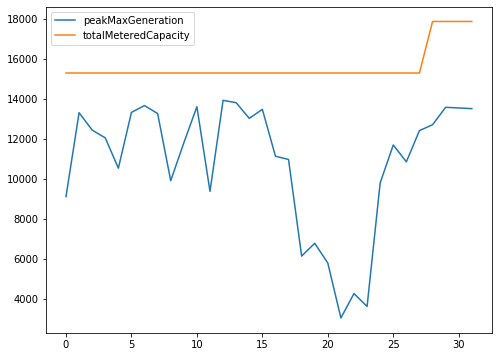

In [28]:
df_gen1.plot()

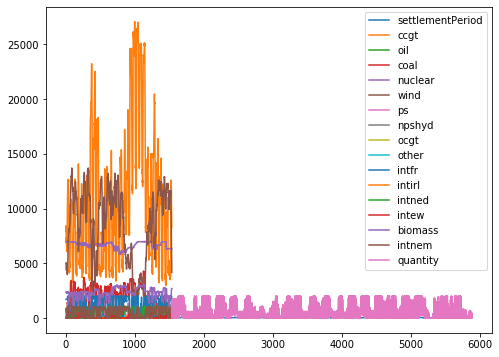

In [33]:
df_gen4.plot()

In [35]:
# Looking at HH generation by type..

df_gen4['startTimeOfHalfHrPeriod'].nunique()

32

In [38]:
df_gen4['startTimeOfHalfHrPeriod']

0       2020-01-01
1       2020-01-01
2       2020-01-01
3       2020-01-01
4       2020-01-01
           ...    
5883    2020-01-23
5884    2020-01-23
5885    2020-01-23
5886    2020-01-23
5887    2020-01-23
Name: startTimeOfHalfHrPeriod, Length: 5888, dtype: object

In [67]:
df_gen4.head(1536)

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,ccgt,oil,coal,nuclear,wind,ps,npshyd,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELHH,2020-01-01,1,7912.0,0.0,670.0,6953.0,5004.0,0.0,672.0,...,130.0,1704.0,0.0,854.0,0.0,2353.0,854.0,True,NaN,NaN
1,FUELHH,2020-01-01,2,8420.0,0.0,670.0,6949.0,5043.0,0.0,669.0,...,123.0,1704.0,0.0,852.0,0.0,2358.0,854.0,True,NaN,NaN
2,FUELHH,2020-01-01,3,8037.0,0.0,670.0,6952.0,5030.0,0.0,662.0,...,122.0,1704.0,0.0,852.0,0.0,2356.0,854.0,True,NaN,NaN
3,FUELHH,2020-01-01,4,7499.0,0.0,670.0,6948.0,4825.0,0.0,591.0,...,122.0,1704.0,0.0,852.0,0.0,2343.0,854.0,True,NaN,NaN
4,FUELHH,2020-01-01,5,7020.0,0.0,669.0,6954.0,4689.0,0.0,548.0,...,121.0,1704.0,0.0,852.0,0.0,2356.0,854.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,FUELHH,2020-02-01,44,10375.0,0.0,1166.0,6322.0,6313.0,0.0,875.0,...,127.0,2002.0,0.0,1056.0,0.0,2629.0,1000.0,True,NaN,NaN
1532,FUELHH,2020-02-01,45,9510.0,0.0,1207.0,6317.0,5969.0,16.0,791.0,...,157.0,1806.0,0.0,904.0,0.0,2663.0,904.0,True,NaN,NaN
1533,FUELHH,2020-02-01,46,9007.0,0.0,1204.0,6320.0,5401.0,86.0,790.0,...,138.0,1804.0,0.0,902.0,0.0,2690.0,902.0,True,NaN,NaN
1534,FUELHH,2020-02-01,47,8642.0,0.0,1207.0,6317.0,4474.0,122.0,787.0,...,152.0,1708.0,0.0,854.0,0.0,2705.0,854.0,True,NaN,NaN


In [68]:
df_gen4.head(1537)

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,ccgt,oil,coal,nuclear,wind,ps,npshyd,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELHH,2020-01-01,1,7912.0,0.0,670.0,6953.0,5004.0,0.0,672.0,...,130.0,1704.0,0.0,854.0,0.0,2353.0,854.0,True,NaN,NaN
1,FUELHH,2020-01-01,2,8420.0,0.0,670.0,6949.0,5043.0,0.0,669.0,...,123.0,1704.0,0.0,852.0,0.0,2358.0,854.0,True,NaN,NaN
2,FUELHH,2020-01-01,3,8037.0,0.0,670.0,6952.0,5030.0,0.0,662.0,...,122.0,1704.0,0.0,852.0,0.0,2356.0,854.0,True,NaN,NaN
3,FUELHH,2020-01-01,4,7499.0,0.0,670.0,6948.0,4825.0,0.0,591.0,...,122.0,1704.0,0.0,852.0,0.0,2343.0,854.0,True,NaN,NaN
4,FUELHH,2020-01-01,5,7020.0,0.0,669.0,6954.0,4689.0,0.0,548.0,...,121.0,1704.0,0.0,852.0,0.0,2356.0,854.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,FUELHH,2020-02-01,45,9510.0,0.0,1207.0,6317.0,5969.0,16.0,791.0,...,157.0,1806.0,0.0,904.0,0.0,2663.0,904.0,True,NaN,NaN
1533,FUELHH,2020-02-01,46,9007.0,0.0,1204.0,6320.0,5401.0,86.0,790.0,...,138.0,1804.0,0.0,902.0,0.0,2690.0,902.0,True,NaN,NaN
1534,FUELHH,2020-02-01,47,8642.0,0.0,1207.0,6317.0,4474.0,122.0,787.0,...,152.0,1708.0,0.0,854.0,0.0,2705.0,854.0,True,NaN,NaN
1535,FUELHH,2020-02-01,48,8284.0,0.0,1048.0,6313.0,4160.0,0.0,789.0,...,128.0,1708.0,0.0,852.0,0.0,2695.0,854.0,True,NaN,NaN


In [69]:
# Need to remove data from places not in UK -> but may be useful later

In [70]:
filtered_df = df_gen4[df_gen4[['ccgt', 'oil', 'coal']].notnull().all(1)]


In [71]:
new_df = filtered_df.drop(['activeFlag', 'biddingZone', 'quantity'], axis = 1)

In [72]:
new_df

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,ccgt,oil,coal,nuclear,wind,ps,npshyd,ocgt,other,intfr,intirl,intned,intew,biomass,intnem
0,FUELHH,2020-01-01,1,7912.0,0.0,670.0,6953.0,5004.0,0.0,672.0,3.0,130.0,1704.0,0.0,854.0,0.0,2353.0,854.0
1,FUELHH,2020-01-01,2,8420.0,0.0,670.0,6949.0,5043.0,0.0,669.0,3.0,123.0,1704.0,0.0,852.0,0.0,2358.0,854.0
2,FUELHH,2020-01-01,3,8037.0,0.0,670.0,6952.0,5030.0,0.0,662.0,3.0,122.0,1704.0,0.0,852.0,0.0,2356.0,854.0
3,FUELHH,2020-01-01,4,7499.0,0.0,670.0,6948.0,4825.0,0.0,591.0,3.0,122.0,1704.0,0.0,852.0,0.0,2343.0,854.0
4,FUELHH,2020-01-01,5,7020.0,0.0,669.0,6954.0,4689.0,0.0,548.0,3.0,121.0,1704.0,0.0,852.0,0.0,2356.0,854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,FUELHH,2020-02-01,44,10375.0,0.0,1166.0,6322.0,6313.0,0.0,875.0,0.0,127.0,2002.0,0.0,1056.0,0.0,2629.0,1000.0
1532,FUELHH,2020-02-01,45,9510.0,0.0,1207.0,6317.0,5969.0,16.0,791.0,0.0,157.0,1806.0,0.0,904.0,0.0,2663.0,904.0
1533,FUELHH,2020-02-01,46,9007.0,0.0,1204.0,6320.0,5401.0,86.0,790.0,1.0,138.0,1804.0,0.0,902.0,0.0,2690.0,902.0
1534,FUELHH,2020-02-01,47,8642.0,0.0,1207.0,6317.0,4474.0,122.0,787.0,1.0,152.0,1708.0,0.0,854.0,0.0,2705.0,854.0


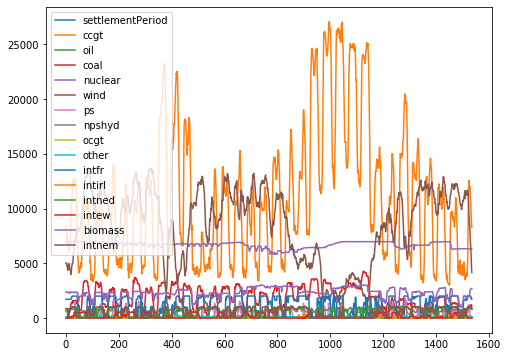

In [73]:
new_df.plot()

In [76]:

# Number of entries
len(new_df)

# Change to make new datetime object based on settlement period frequency (30 mins)

dates = pd.date_range(start=start,periods=len(new_df), freq='30T') 

new_df.index = dates

new_df = new_df.drop(['recordType', 'startTimeOfHalfHrPeriod', 'settlementPeriod'], axis = 1)

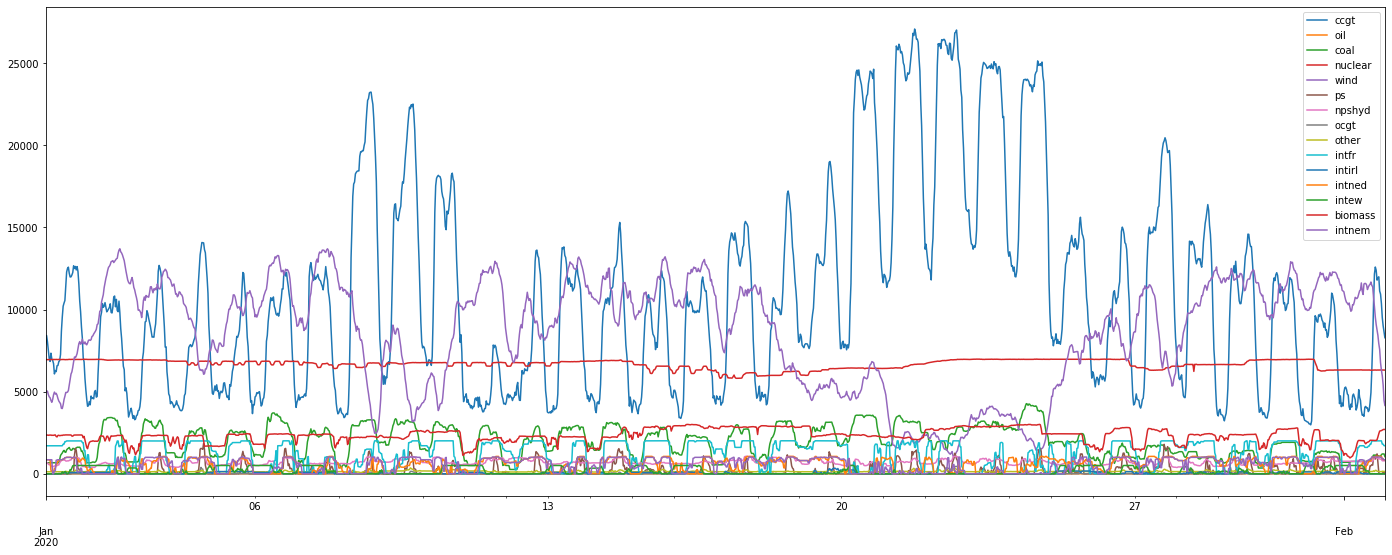

In [77]:
new_df.plot(figsize=(24,9))

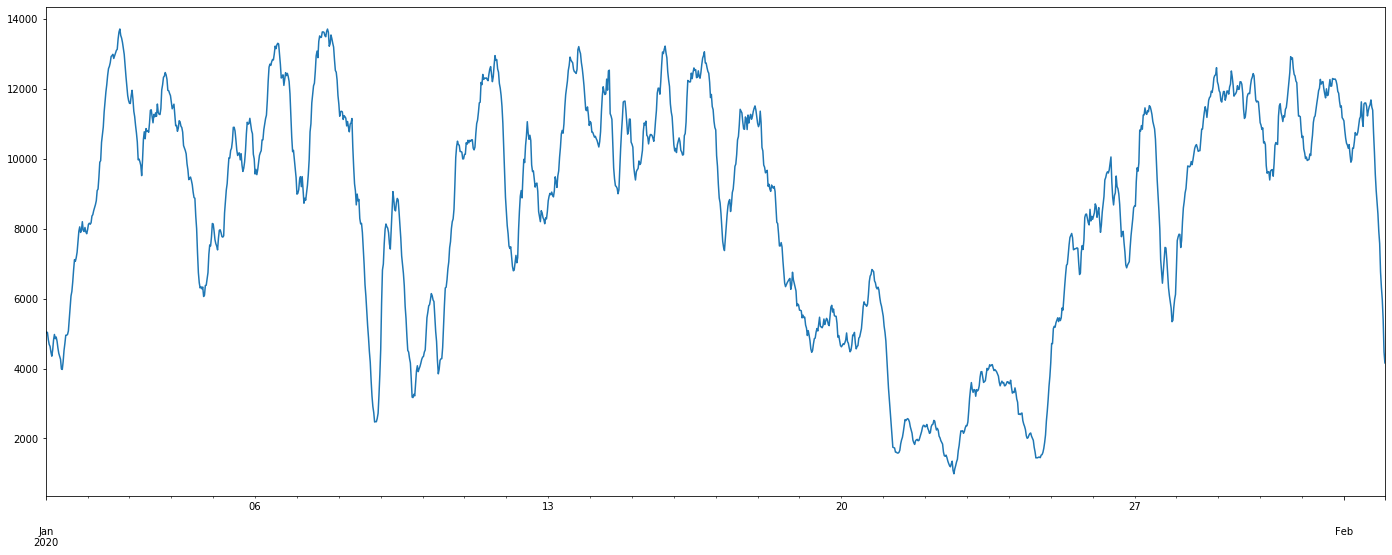

In [78]:
new_df['wind'].plot(figsize=(24,9))

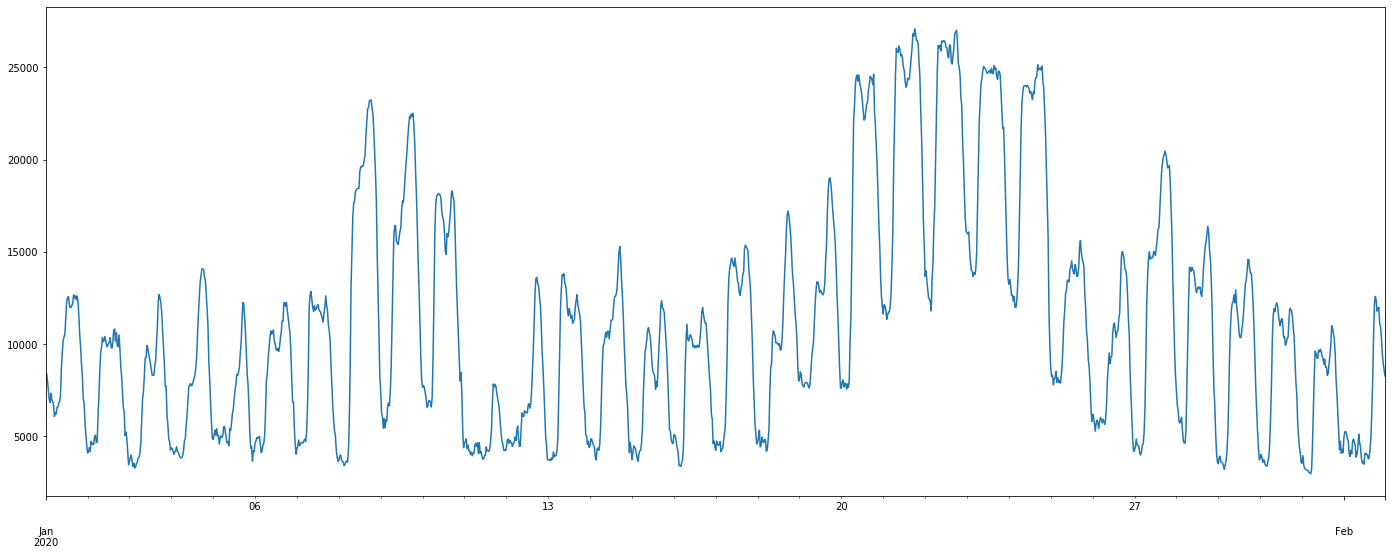

In [79]:
new_df['ccgt'].plot(figsize=(24,9))

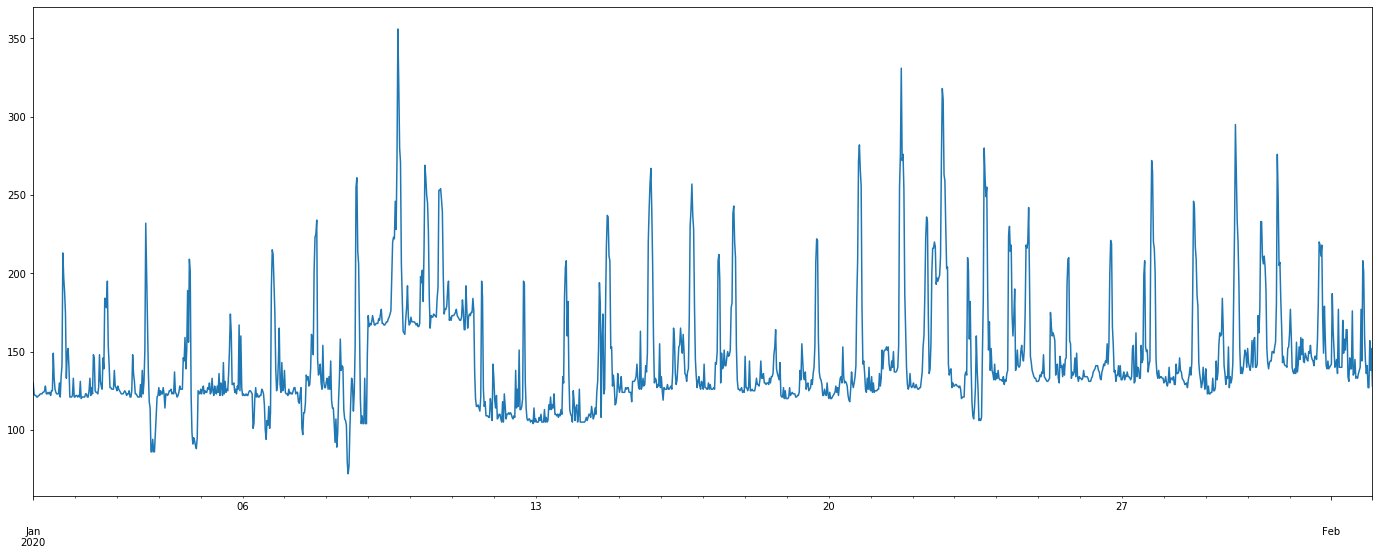

In [80]:
new_df['other'].plot(figsize=(24,9)) # Is this solar????

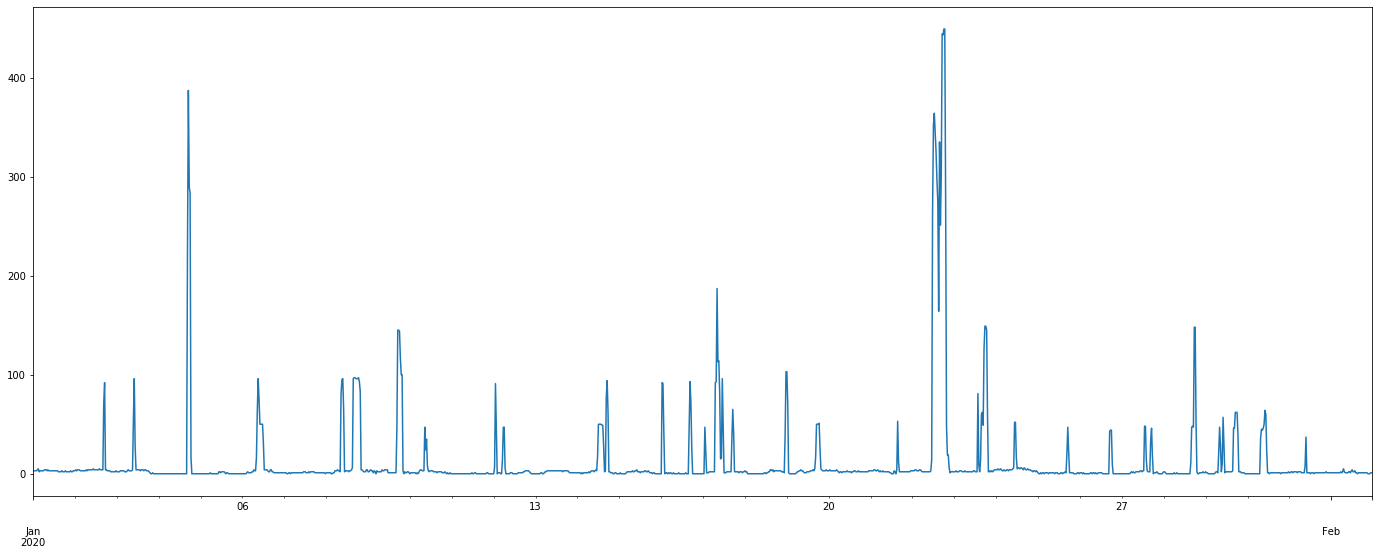

In [83]:
new_df['ocgt'].plot(figsize=(24,9))

In [105]:
# Looking at B1630

gen5 = api.request('B1630',SettlementDate = start, Period = '48')
df_gen5 = pd.DataFrame(gen5) # Forecast...

In [87]:
df_gen5

,timeSeriesID,businessType,powerSystemResourceType,settlementDate,settlementPeriod,quantity,documentType,processType,curveType,resolution,activeFlag,documentID,documentRevNum
0,NGET-EMFIP-AGWS-TS-00306256,Solar generation,"""Solar""",2020-01-01,48,0.000,Wind and solar generation,Realised,Sequential fixed size block,PT30M,True,NGET-EMFIP-AGWS-00150956,1
1,NGET-EMFIP-AGWS-TS-00306257,Wind generation,"""Wind Offshore""",2020-01-01,48,2438.402,Wind and solar generation,Realised,Sequential fixed size block,PT30M,True,NGET-EMFIP-AGWS-00150956,1
2,NGET-EMFIP-AGWS-TS-00306258,Wind generation,"""Wind Onshore""",2020-01-01,48,5637.955,Wind and solar generation,Realised,Sequential fixed size block,PT30M,True,NGET-EMFIP-AGWS-00150956,1


In [96]:
import ElexonDataPortal.API as edp_API

# VERY SLOW!

edp_wrapper = edp_API.Wrapper(API_KEY)

In [97]:
# Takes around 30 mins per day...10950mins = 60hrs for a year... :c
# This could be done on a one-time asis -> but what about updating ?
stream = 'B1630'

query_args = {
    'start_date' : start,
    'end_date' : end,
}

gen5 = edp_wrapper.query_orchestrator(stream, query_args)

gen5

 [█████████████████████████████████████████████████###########] 1233/1489 [27:36<00:01, 1.34s/it]

KeyboardInterrupt: 

In [161]:
#### ENERGY MIX PREDICTIONS - 1DAY AHEAD ###

inst = api.request('FUELINST',FromDate = now, ToDate = '2020-09-16') # To date doesnt make sense here...

In [162]:
inst = pd.DataFrame(inst)

In [163]:
inst

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,publishingPeriodCommencingTime,ccgt,oil,coal,nuclear,wind,ps,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELINST,2020-08-24,48,2020-08-24 23:00:00,11280.0,0.0,0.0,3512.0,3146.0,136.0,...,107.0,1132.0,289.0,281.0,504.0,1247.0,189.0,True,NaN,NaN
1,FUELINST,2020-08-25,1,2020-08-24 23:05:00,11418.0,0.0,0.0,3512.0,3194.0,157.0,...,108.0,637.0,302.0,0.0,504.0,1248.0,650.0,True,NaN,NaN
2,FUELINST,2020-08-25,1,2020-08-24 23:10:00,11415.0,0.0,0.0,3510.0,3254.0,158.0,...,113.0,277.0,302.0,0.0,504.0,1248.0,777.0,True,NaN,NaN
3,FUELINST,2020-08-25,1,2020-08-24 23:15:00,11356.0,0.0,0.0,3511.0,3293.0,85.0,...,112.0,264.0,303.0,0.0,504.0,1246.0,777.0,True,NaN,NaN
4,FUELINST,2020-08-25,1,2020-08-24 23:20:00,11253.0,0.0,0.0,3510.0,3359.0,68.0,...,108.0,265.0,303.0,0.0,504.0,1247.0,777.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,FUELINST,2020-08-25,47,2020-08-25 22:05:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NETHERLANDS,0.0
480,FUELINST,2020-08-25,48,2020-08-25 22:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,BELGIUM,2792.0
481,FUELINST,2020-08-25,48,2020-08-25 22:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,FRANCE,0.0
482,FUELINST,2020-08-25,48,2020-08-25 22:35:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,IRELAND,1843.0


In [164]:
filtered_inst = inst[inst[['ccgt', 'oil', 'coal']].notnull().all(1)]


In [165]:
filtered_inst

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,publishingPeriodCommencingTime,ccgt,oil,coal,nuclear,wind,ps,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELINST,2020-08-24,48,2020-08-24 23:00:00,11280.0,0.0,0.0,3512.0,3146.0,136.0,...,107.0,1132.0,289.0,281.0,504.0,1247.0,189.0,True,NaN,NaN
1,FUELINST,2020-08-25,1,2020-08-24 23:05:00,11418.0,0.0,0.0,3512.0,3194.0,157.0,...,108.0,637.0,302.0,0.0,504.0,1248.0,650.0,True,NaN,NaN
2,FUELINST,2020-08-25,1,2020-08-24 23:10:00,11415.0,0.0,0.0,3510.0,3254.0,158.0,...,113.0,277.0,302.0,0.0,504.0,1248.0,777.0,True,NaN,NaN
3,FUELINST,2020-08-25,1,2020-08-24 23:15:00,11356.0,0.0,0.0,3511.0,3293.0,85.0,...,112.0,264.0,303.0,0.0,504.0,1246.0,777.0,True,NaN,NaN
4,FUELINST,2020-08-25,1,2020-08-24 23:20:00,11253.0,0.0,0.0,3510.0,3359.0,68.0,...,108.0,265.0,303.0,0.0,504.0,1247.0,777.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,FUELINST,2020-08-25,48,2020-08-25 22:35:00,5541.0,0.0,0.0,3537.0,11867.0,0.0,...,140.0,0.0,81.0,0.0,344.0,727.0,558.0,True,NaN,NaN
284,FUELINST,2020-08-25,48,2020-08-25 22:40:00,5407.0,0.0,0.0,3541.0,11813.0,0.0,...,132.0,0.0,81.0,0.0,319.0,726.0,558.0,True,NaN,NaN
285,FUELINST,2020-08-25,48,2020-08-25 22:45:00,5288.0,0.0,0.0,3539.0,11648.0,0.0,...,138.0,0.0,81.0,0.0,294.0,725.0,559.0,True,NaN,NaN
286,FUELINST,2020-08-25,48,2020-08-25 22:50:00,5288.0,0.0,0.0,3535.0,11574.0,0.0,...,131.0,0.0,77.0,0.0,268.0,724.0,558.0,True,NaN,NaN


In [166]:
filtered_inst

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,publishingPeriodCommencingTime,ccgt,oil,coal,nuclear,wind,ps,...,other,intfr,intirl,intned,intew,biomass,intnem,activeFlag,biddingZone,quantity
0,FUELINST,2020-08-24,48,2020-08-24 23:00:00,11280.0,0.0,0.0,3512.0,3146.0,136.0,...,107.0,1132.0,289.0,281.0,504.0,1247.0,189.0,True,NaN,NaN
1,FUELINST,2020-08-25,1,2020-08-24 23:05:00,11418.0,0.0,0.0,3512.0,3194.0,157.0,...,108.0,637.0,302.0,0.0,504.0,1248.0,650.0,True,NaN,NaN
2,FUELINST,2020-08-25,1,2020-08-24 23:10:00,11415.0,0.0,0.0,3510.0,3254.0,158.0,...,113.0,277.0,302.0,0.0,504.0,1248.0,777.0,True,NaN,NaN
3,FUELINST,2020-08-25,1,2020-08-24 23:15:00,11356.0,0.0,0.0,3511.0,3293.0,85.0,...,112.0,264.0,303.0,0.0,504.0,1246.0,777.0,True,NaN,NaN
4,FUELINST,2020-08-25,1,2020-08-24 23:20:00,11253.0,0.0,0.0,3510.0,3359.0,68.0,...,108.0,265.0,303.0,0.0,504.0,1247.0,777.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,FUELINST,2020-08-25,48,2020-08-25 22:35:00,5541.0,0.0,0.0,3537.0,11867.0,0.0,...,140.0,0.0,81.0,0.0,344.0,727.0,558.0,True,NaN,NaN
284,FUELINST,2020-08-25,48,2020-08-25 22:40:00,5407.0,0.0,0.0,3541.0,11813.0,0.0,...,132.0,0.0,81.0,0.0,319.0,726.0,558.0,True,NaN,NaN
285,FUELINST,2020-08-25,48,2020-08-25 22:45:00,5288.0,0.0,0.0,3539.0,11648.0,0.0,...,138.0,0.0,81.0,0.0,294.0,725.0,559.0,True,NaN,NaN
286,FUELINST,2020-08-25,48,2020-08-25 22:50:00,5288.0,0.0,0.0,3535.0,11574.0,0.0,...,131.0,0.0,77.0,0.0,268.0,724.0,558.0,True,NaN,NaN


In [167]:
filtered_inst.index = pd.to_datetime(filtered_inst.index)

In [168]:
type(filtered_inst.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [169]:
filtered_inst.drop(['publishingPeriodCommencingTime','startTimeOfHalfHrPeriod','settlementPeriod','biddingZone', 'quantity', 'activeFlag'], axis =1, inplace=True)

/Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


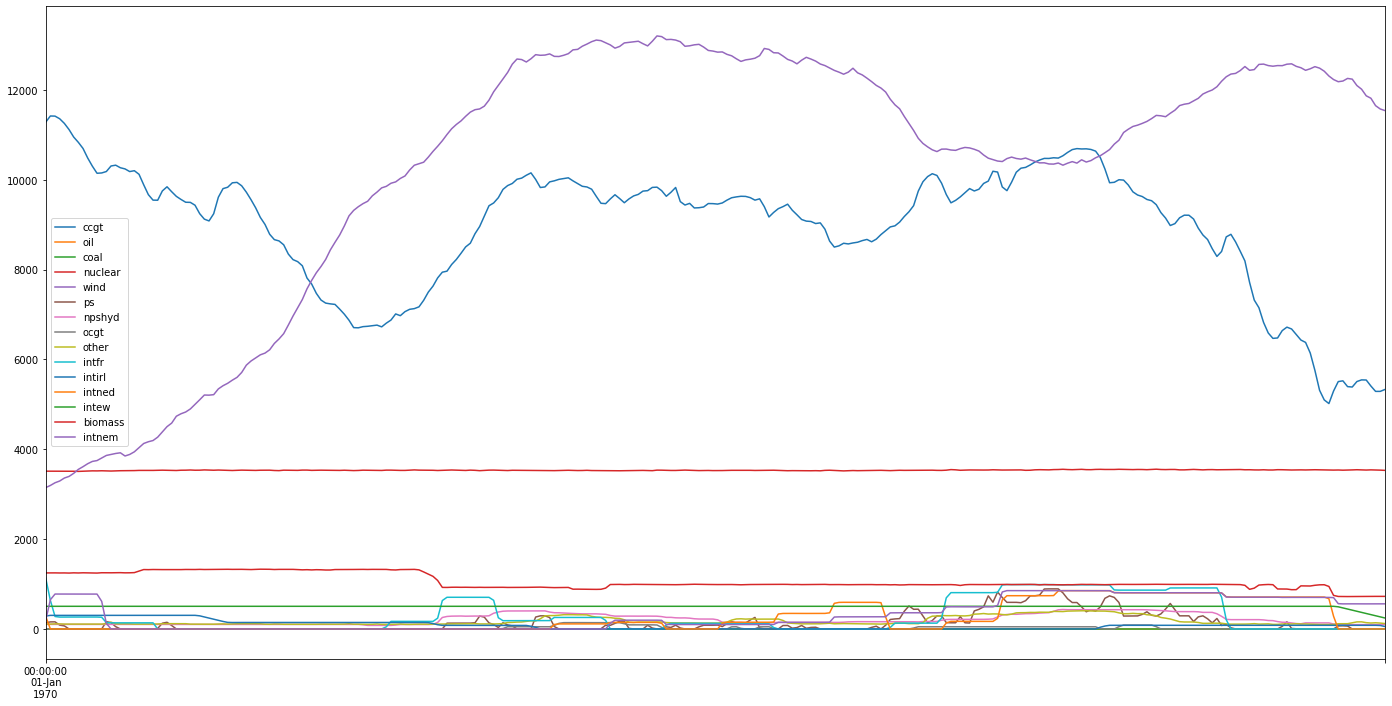

In [170]:
filtered_inst.plot(figsize=(24,12))

In [171]:
### Do we need to make predictins if forecasts are actually provided?

In [217]:
#### WIND PREDICTIONS - 1DAY AHEAD ###

inst2 = api.request('WINDFORFUELHH',FromDate = now, ToDate = '2020-09-16') # again... dont know why end date is here...

In [218]:
inst2 = pd.DataFrame(inst2)

In [219]:
inst2

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,initialForecastPublishingPeriodCommencingTime,initialForecastSpnGeneration,latestForecastPublishingPeriodCommencingTime,latestForecastSpnGeneration,outTurnPublishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,WIND,2020-08-26,1,2020-08-24 03:30:00,13022,2020-08-25 19:30:00,13105,None,None,True
1,WIND,2020-08-26,3,2020-08-24 03:30:00,13039,2020-08-25 19:30:00,13193,None,None,True
2,WIND,2020-08-26,5,2020-08-24 03:30:00,12885,2020-08-25 19:30:00,13301,None,None,True
3,WIND,2020-08-26,7,2020-08-24 03:30:00,12693,2020-08-25 19:30:00,13054,None,None,True
4,WIND,2020-08-26,9,2020-08-24 03:30:00,12666,2020-08-25 19:30:00,12731,None,None,True
5,WIND,2020-08-26,11,2020-08-24 03:30:00,12262,2020-08-25 19:30:00,12247,None,None,True
6,WIND,2020-08-26,13,2020-08-24 03:30:00,12027,2020-08-25 19:30:00,11722,None,None,True
7,WIND,2020-08-26,15,2020-08-24 03:30:00,11559,2020-08-25 19:30:00,11051,None,None,True
8,WIND,2020-08-26,17,2020-08-24 03:30:00,11008,2020-08-25 19:30:00,10277,None,None,True
9,WIND,2020-08-26,19,2020-08-24 03:30:00,10416,2020-08-25 19:30:00,9475,None,None,True


In [220]:
inst2 = inst2.drop(['recordType', 'startTimeOfHalfHrPeriod', 'settlementPeriod'], axis = 1)

In [227]:
# Number of entries
len(inst2)

# Change to make new datetime object based on settlement period frequency (30 mins)

dates = pd.date_range(start='2020-08-24',periods=len(inst2), freq='30T') 

inst2.index = dates

In [228]:
inst2

,initialForecastPublishingPeriodCommencingTime,initialForecastSpnGeneration,latestForecastPublishingPeriodCommencingTime,latestForecastSpnGeneration,outTurnPublishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
2020-08-24 00:00:00,2020-08-24 03:30:00,13022,2020-08-25 19:30:00,13105,None,None,True
2020-08-24 00:30:00,2020-08-24 03:30:00,13039,2020-08-25 19:30:00,13193,None,None,True
2020-08-24 01:00:00,2020-08-24 03:30:00,12885,2020-08-25 19:30:00,13301,None,None,True
2020-08-24 01:30:00,2020-08-24 03:30:00,12693,2020-08-25 19:30:00,13054,None,None,True
2020-08-24 02:00:00,2020-08-24 03:30:00,12666,2020-08-25 19:30:00,12731,None,None,True
2020-08-24 02:30:00,2020-08-24 03:30:00,12262,2020-08-25 19:30:00,12247,None,None,True
2020-08-24 03:00:00,2020-08-24 03:30:00,12027,2020-08-25 19:30:00,11722,None,None,True
2020-08-24 03:30:00,2020-08-24 03:30:00,11559,2020-08-25 19:30:00,11051,None,None,True
2020-08-24 04:00:00,2020-08-24 03:30:00,11008,2020-08-25 19:30:00,10277,None,None,True
2020-08-24 04:30:00,2020-08-24 03:30:00,10416,2020-08-25 19:30:00,9475,None,None,True


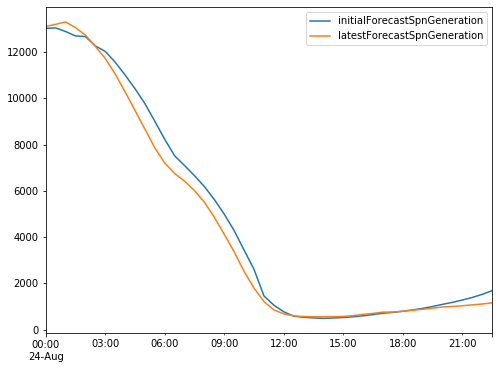

In [233]:
inst2[['initialForecastSpnGeneration','latestForecastSpnGeneration']].plot()

In [230]:
inst2.index = pd.to_datetime(inst2.index)